In [67]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import os 
from shapely.geometry import mapping
import elevation
import rasterio as rio
import rioxarray as riox
from rasterio.plot import show

import matplotlib.pyplot as plt 
import os
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

from matplotlib import pyplot
from rasterio.plot import show

In [68]:
#!pip install elevation

In [69]:

dpt_shp = gpd.read_file( r'../../data/geopandas_data/LIMITE_DEPARTAMENTO/LIMITE_DEP.shp' )

In [70]:
lidar_chm_im = riox.open_rasterio( r'C:/Users/Roberto/Documents/DEM_world.tif',
                                 masked=True).squeeze()

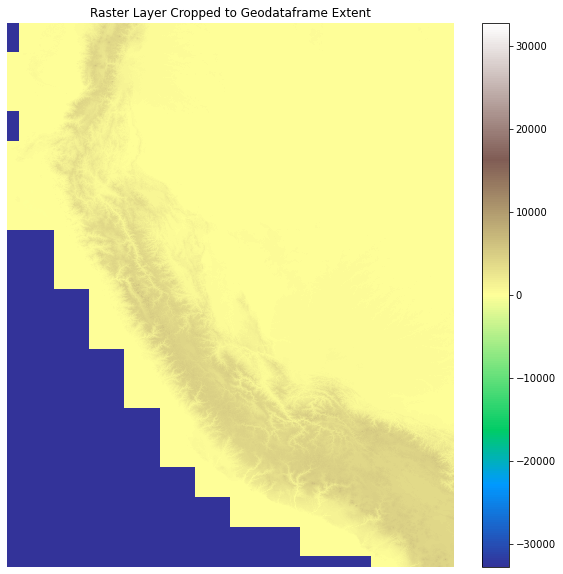

In [71]:
f, ax = plt.subplots(figsize=(10, 10))
lidar_chm_im.plot(ax=ax, cmap='terrain')
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [78]:
lidar_clipped = lidar_chm_im.rio.clip(dpt_shp.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      dpt_shp.crs)

In [73]:
bounds_combined = dpt_shp.bounds
west_c, south_c, east_c, north_c = bounds_combined
elevation.clip(bounds=bounds_combined, output='C:/Users/Roberto/Documents/DEM_world.tif', product='SRTM1')
dem = rio.open(output)
show(dem)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

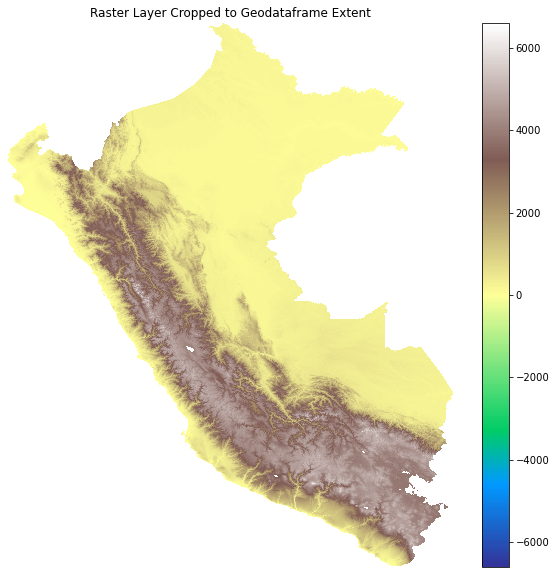

In [76]:
f, ax = plt.subplots(figsize=(10, 10))
lidar_clipped.plot(ax=ax, cmap='terrain')
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()